<a href="https://colab.research.google.com/github/rakibulalamshamim/MAT120lab/blob/main/Lab4_Numerical_integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Numerical Integration


1.   Trapezoidal Rule
2.   Simpson's Rule



# Trapezoidal Rule
 $$\int^{b}_{a} y dx = \frac{h}{2} \sum_{i=0}^{n-1} \left[y_i + y_{i+1}\right]
 $$

In [20]:
import numpy as np

In [21]:
a, b, n = 0, np.pi, 1000
h = (b-a)/n
x = np.linspace(a, b, n+1)
y = np.sin(x)
Trapz = 0

for i in range(0, n):
  Trapz += h/2*(y[i]+y[i+1])

Trapz

1.999998355065662

## Classwork: Find the Bernoulli integral $$\int_0^1 x^x dx ≈ 0.78343051071213$$

## Trapezoidal rule Using `scipy`
The scipy.integrate sub-package provides several integration techniques including an ordinary differential equation integrator.

In [22]:
from scipy import integrate as it

### scipy `quad(func, lower_limit, upper_limit)` function is used for numerical integration.

In [23]:
def y(x): return np.sin(x)
it.quad(y, 0, np.pi)

(2.0, 2.220446049250313e-14)

### Use `scipy.integrate.trapezoid(y, x)` from `scipy` for trapezoidal rule.

In [24]:

x = np.linspace(0, np.pi, n+1)
it.trapezoid(np.sin(x), x)

1.9999983550656628

# Simpson's Rule

$$ \int^b_a y dx = \frac{h}{3}\sum_{i=1, \ i \ \textbf{ odd}}^{n-1}(y_{i-1}+4 y_i+y_{i+1})
$$

where $n$ must be even.

## Let's integrate
$$\int^{\pi}_0 \sin(x) \ dx = 2$$

In [25]:
a, b, n = 0, np.pi, 1000
h = (b-a)/n
x = np.linspace(a, b, n+1)
y = np.sin(x)
Simpson = 0
for i in range(1, n, 2):
  Simpson += (h/3)*(y[i-1] + 4*y[i] + y[i+1])

Simpson

2.0000000000010827

#Simpson's rule Using `scipy`


In [27]:
from scipy import integrate as it
def y(x): return np.sin(x)
it.simpson(y(x), x)

2.0000000000010822

#How to deal with infinity

1.   When the upper limit $b=∞$ take large value of $b$ instead and the sum will converge. Remember to make sure that $(b-a)< n. \ $  (Take negative large value of $a$ if $a= -\infty$)
2.   Increase the value of $b$ and calculate the sum until the value has converged upto a point.




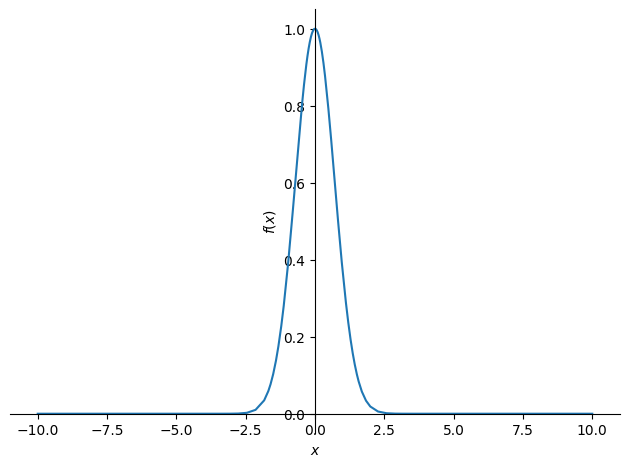

In [28]:
from sympy import *
x = symbols('x')
y = exp(-x**2)
plot(y, (x, -10, 10))

$$\int^{∞}_0 e^{-x^2}dx = \frac{\sqrt{\pi}}{2}$$

In [29]:
a = 0
b = 10                                       # Large upper limit
n = 10000
h = (b-a)/n
x = np.linspace(a, b, n+1)
y = np.exp(-x**2)
Trapz = 0

for i in range(0, n):
  Trapz += h/2*(y[i]+y[i+1])

Trapz
Trapz, np.sqrt(np.pi)/2

(0.8862269254527564, 0.8862269254527579)

##With while loop

In [39]:
a, b, n = 0, 1, 1000
t = 10**(-3)                                  # Tolerance
dummy_var = 10                                # This is a dummy variable, will be used only once

while True:
  h = (b-a)/n
  x = np.linspace(a, b, n+1)
  y = np.exp(-x**2)
  Trapz = 0
  for i in range(0, n):
    Trapz += h/2*(y[i]+y[i+1])
  if np.fabs(Trapz - dummy_var)<t:
    break
  else:
    dummy_var = Trapz
    b+=1

Trapz

0.8862269117883683

# Error analysis:
**The *“error”* is the difference between the actual *“true”* value and the approximation.**
## Error for **trapezoidal** method is bounded by:
$$\text{Error} \leq \frac{h^2(b-a)}{12} \textit{max}|y^{\prime\prime}(x)| $$
So, the order of error in this method: $$Error \sim O(h^2)$$

## Error for **Simpson's** method is bounded by:
$$\text{Error} \leq \frac{h^4(b-a)}{180} \textit{max}|y^{(4)}(x)| $$
So, the order of error in Simpson's rule: $$Error \sim O(h^4)$$

Text(0.5, 1.0, "Error vs. h graph for Simpson's rule")

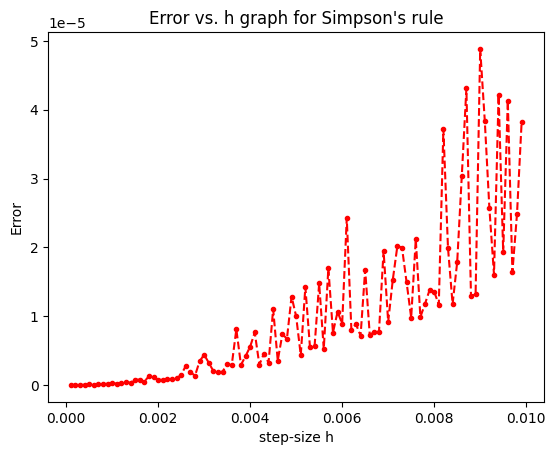

In [31]:
def Trapz(a, b, h):
  x = np.arange(a, b+h, h)
  Trapezoid = 0
  for j in range(0, len(x)-1):
    Trapezoid += h/2*(y(x[j])+y(x[j+1]))
  return Trapezoid
def y(x): return np.sin(x)

import numpy as np
import matplotlib.pyplot as plt
a, b = 0, np.pi
true_value = 2
h_array = np.arange(0.0001, 0.01, 0.0001)
Error = []
for i in range(0, len(h_array)):
  our_result = Trapz(a, b, h_array[i])
  e = np.abs(true_value - our_result)
  Error.append(e)
plt.plot(h_array, Error, 'r.--')
plt.xlabel('step-size h')
plt.ylabel('Error')
plt.title("Error vs. h graph for Simpson's rule")

Text(0.5, 1.0, "Error vs. h graph for Trapezoidal's rule")

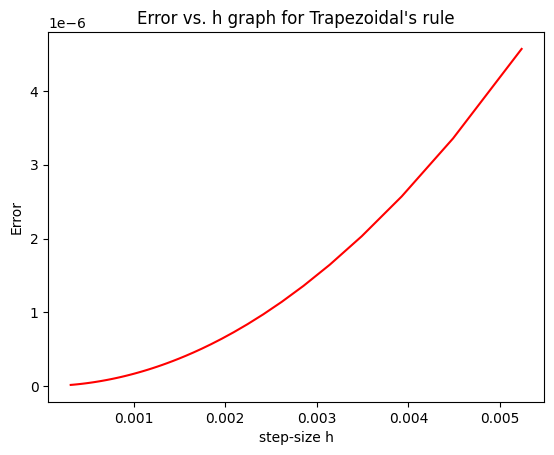

In [32]:
def Trapz(a, b, n):
  x = np.linspace(a, b, n+1)
  h = (b-a)/n
  Trapezoid = 0
  for j in range(0, len(x)-1):
    Trapezoid += h/2*(y(x[j])+y(x[j+1]))
  return Trapezoid
def y(x): return np.sin(x)

import numpy as np
import matplotlib.pyplot as plt
a, b         = 0, np.pi
true_value   = 2
n_array      = np.array( [ n for n in range(10000, 500, -100) ] )
h_array      = np.array( [ (b-a)/n for n in range(10000, 500, -100) ] )
Error        = []
for i in range(0, len(h_array)):
  our_result = Trapz(a, b, n_array[i])
  e = np.abs(true_value - our_result)
  Error.append(e)
plt.plot(h_array, Error, 'r')
plt.xlabel('step-size h')
plt.ylabel('Error')
plt.title("Error vs. h graph for Trapezoidal's rule")

### Now we are gonna plot $(h \ \text{vs.} \ h^2)$ curve and see that the graph is identical to the previous one. This empirically shows that the order of error is actually $O(h^2)$ in trapezoidal rule.

Text(0.5, 1.0, '$h^2$ vs. $h$ graph')

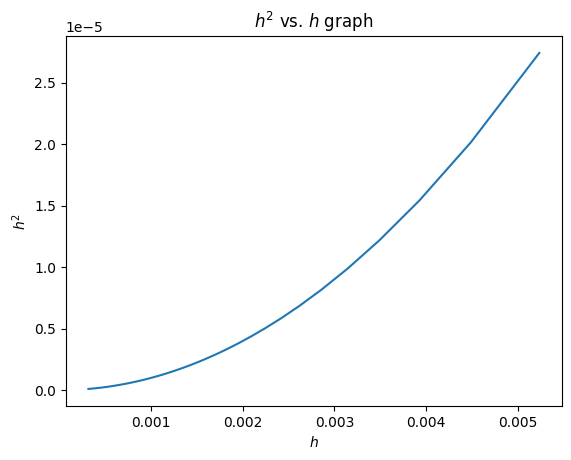

In [33]:
plt.plot(h_array, h_array**2)
plt.xlabel('$h$')
plt.ylabel('$h^2$')
plt.title("$h^2$ vs. $h$ graph")

Text(0.5, 1.0, "$Error$ vs. $h$ graph for Simpson's rule")

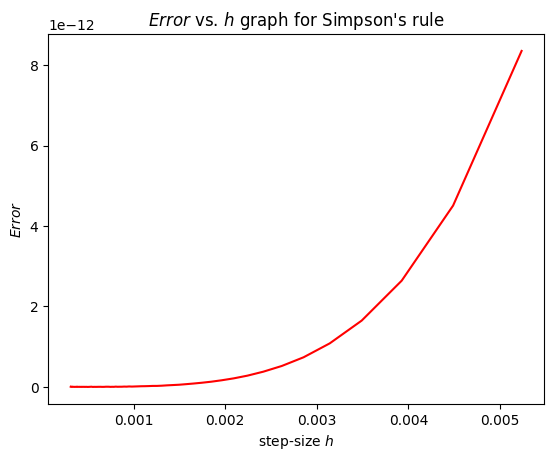

In [34]:
def Simpson(a, b, n):
  x = np.linspace(a, b, n+1)
  h = (b-a)/n
  Simpson = 0
  for i in range(1, len(x)-1, 2):
    Simpson += (h/3)*(y(x[i-1]) + 4*y(x[i]) + y(x[i+1]))
  return Simpson
def y(x): return np.sin(x)

import numpy as np
import matplotlib.pyplot as plt
a, b         = 0, np.pi
true_value   = 2
n_array      = np.array( [ n for n in range(10000, 500, -100) ] )
h_array      = np.array( [ (b-a)/n for n in range(10000, 500, -100) ] )
Error_sim        = []
for i in range(0, len(h_array)):
  our_result = Simpson(a, b, n_array[i])
  e = np.abs(true_value - our_result)
  Error_sim.append(e)
plt.plot(h_array, Error_sim, 'r')
plt.xlabel('step-size $h$')
plt.ylabel('$Error$')
plt.title("$Error$ vs. $h$ graph for Simpson's rule")

### Now we are gonna plot $(h \ \text{vs.} \ h^4)$ curve and see that the graph is identical to the previous one. This empirically shows that the order of error is actually $O(h^4)$ in Simpson's rule.

Text(0.5, 1.0, '$h^4$ vs. $h$ graph')

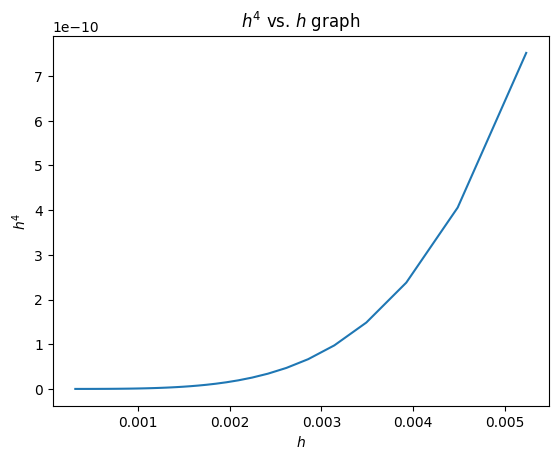

In [35]:
plt.plot(h_array, h_array**4)
plt.xlabel('$h$')
plt.ylabel('$h^4$')
plt.title("$h^4$ vs. $h$ graph")

#Comparison:

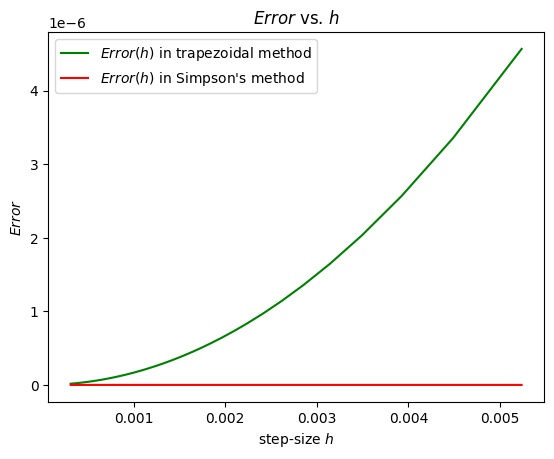

In [36]:
plt.plot(h_array, Error, 'g', label = '$Error(h)$ in trapezoidal method')
plt.plot(h_array, Error_sim, 'r', label = "$Error(h)$ in Simpson's method")
plt.xlabel('step-size $h$')
plt.ylabel('$Error$')
plt.title("$Error$ vs. $h$")
plt.legend()